In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
jsonl_path="data/20240918175257_llm_gen.jsonl"

df=pd.read_json(jsonl_path,lines=True)
df=df.drop(columns=["record","prompt"])
df

,actual_value,CompoundName,SMILES,Property,Unit,predicted,reason,error_rate
0,-135.0000,unknown,C(F)(Cl)Cl,Melting temperature,[oC],250.000,To predict the melting temperature of the Comp...,2.851852
1,3.1000,Triethylsilane,CC[SiH](CC)CC,Vapor pressure,[kPa],3.100,"To predict the vapor pressure of Compound X, w...",0.000000
2,-110.3000,1-Bromopropane,CCCBr,Melting temperature,[oC],-50.000,To predict the melting temperature of Compound...,0.546691
3,0.8900,unknown,CCCCOC(=O)C=C,Density,[g/cm3],1.020,To predict the density of the Compound X compo...,0.146067
4,96.6000,unknown,Br[Sb](Br)Br,Melting temperature,[oC],115.000,To predict the melting temperature of the Comp...,0.190476
...,...,...,...,...,...,...,...,...
467,962.5875,unknown,[SeH2],Vapor pressure,[kPa],960.000,"To predict the vapor pressure of SeH2, we can ...",0.002688
468,2.0668,unknown,Cl[Ag],Refractive index,[-],1.430,To predict the refractive index of * (Silver C...,0.308109
469,0.9200,unknown,CC(C)OCC1CO1,Density,[g/cm3],0.850,The compound * contains several functional gro...,0.076087
470,2.6030,unknown,Br,Density,[g/cm3],3.307,To predict the density of an Compound X substa...,0.270457


<Axes: xlabel='error_rate', ylabel='Count'>

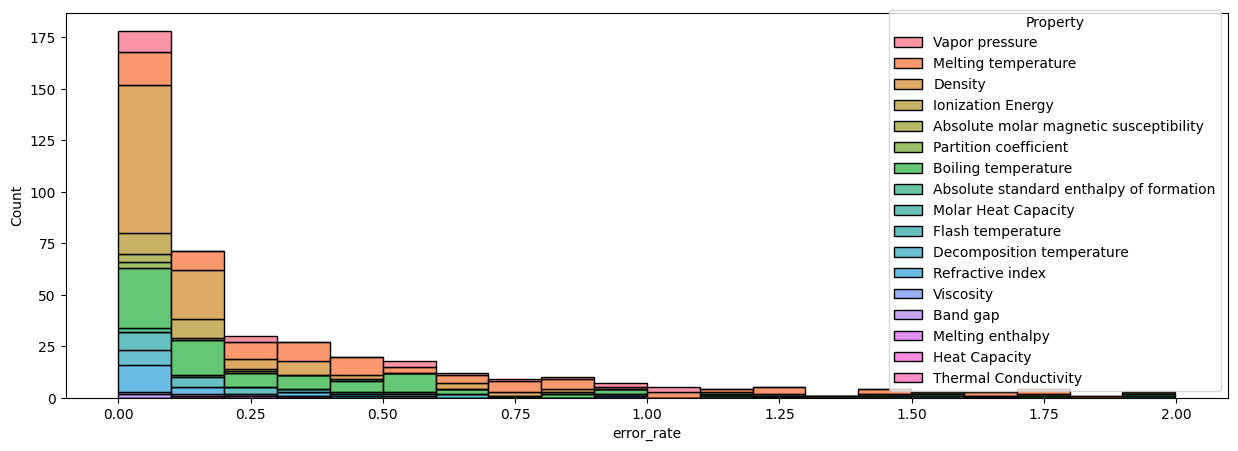

In [3]:
plt.figure(figsize=(15, 5))
sns.histplot(df[df["error_rate"]<2], x="error_rate", hue="Property", multiple="stack", 
             bins=20)